In [1]:
from src.workflow import Workflow
from src.utils_experiment import read_config
from src.utils_data import load_data
from matplotlib import pyplot as plt
import numpy as np

from src.utils_visualization import reduce_and_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
#plt.ioff()
config = read_config('spellman')
X, Y = load_data(config['dataset']['name'])

In [3]:
w = Workflow(X, Y)

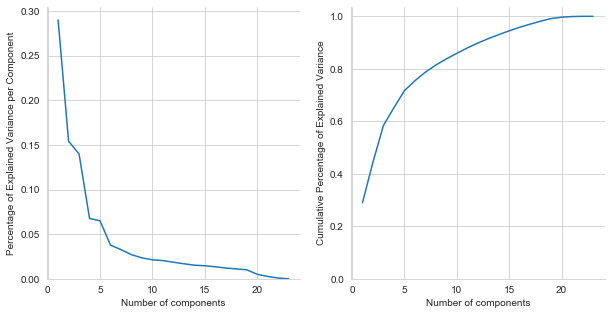

In [14]:
w.pca_plot_var_ratio()
plt.show()

In [15]:
w.reduce_dim(method='pca', n_components=7)

Reducing dimensionality using PCA.
Embedding created. Train MSE: 0.03774697270152685
Train Average Log Likelihood: -5.644803291354607


In [16]:
w.cluster(method='spectral', n_clusters=8, affinity='nearest_neighbors')

Embeddings were constructed using pca.
Clustering using spectral clustering.
Clustering complete.


In [17]:
w.reduce_and_plot(labels=w.y_train_pred, dims=2, method='umap', n_neighbors=20, min_dist=0, metric='euclidean')

Reducing dimensionality using UMAP.


In [18]:
plt.title('2D visualization of the clusters using UMAP.')
plt.savefig('images/spellman_2d_umap.png')